<a href="https://colab.research.google.com/github/ne-adrita/Predicting-Sleep-Quality-through-Behavioral-Pattern-Recognition/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
📊 Regression Evaluation (Keras NN)
MAE: 2.784247636795044
MSE: 10.888574600219727
R²: -0.3413044214248657


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

📊 Classification Evaluation (Keras NN)
Accuracy: 0.338
Classification Report:
               precision    recall  f1-score   support

        Poor       0.39      0.45      0.41       394
     Average       0.32      0.31      0.32       310
        Good       0.27      0.22      0.24       296

    accuracy                           0.34      1000
   macro avg       0.33      0.33      0.32      1000
weighted avg       0.33      0.34      0.33      1000

Confusion Matrix:
 [[176 115 103]
 [139  97  74]
 [140  91  65]]


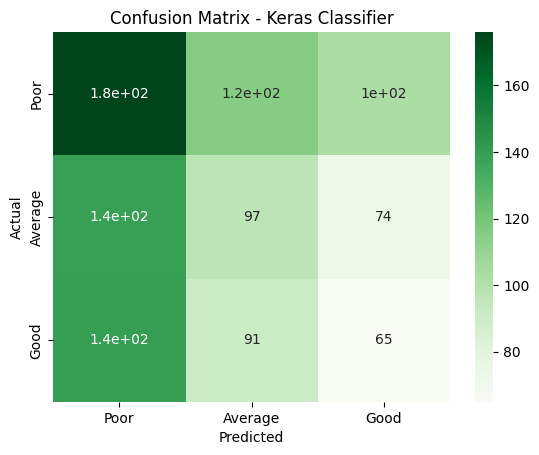

In [1]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/sleep_pattern_analysis_datasett (1).csv')

# 🧹 Step 3: Clean data
df.drop('Person_ID', axis=1, inplace=True)
df['Work Hours (hrs/day)'] = pd.to_numeric(df['Work Hours (hrs/day)'], errors='coerce')
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.dropna(inplace=True)

# 🎯 Step 4: Feature and target split
X = df.drop('Sleep Quality', axis=1)
y = df['Sleep Quality']

# ⚖ Step 5: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------
# 🧠 Step 6A: Keras Regression Model
# --------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

reg_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_r.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

reg_model.compile(optimizer='adam', loss='mse')
reg_model.fit(X_train_r, y_train_r, epochs=100, batch_size=16, verbose=0)

y_pred_r = reg_model.predict(X_test_r).flatten()

print("📊 Regression Evaluation (Keras NN)")
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R²:", r2_score(y_test_r, y_pred_r))

# --------------------------
# 🧠 Step 6B: Keras Classification Model
# --------------------------
# Categorize target
y_class = y.apply(lambda x: 0 if x <= 4 else (1 if x <= 7 else 2))

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

# One-hot encoding for 3 classes
y_train_cat = tf.keras.utils.to_categorical(y_train_c, num_classes=3)
y_test_cat = tf.keras.utils.to_categorical(y_test_c, num_classes=3)

clf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_c.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes
])

clf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
clf_model.fit(X_train_c, y_train_cat, epochs=100, batch_size=16, verbose=0)

# Predict & evaluate
y_pred_prob = clf_model.predict(X_test_c)
y_pred_c = np.argmax(y_pred_prob, axis=1)

print("\n📊 Classification Evaluation (Keras NN)")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c, target_names=["Poor", "Average", "Good"]))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

# 📊 Plot confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=["Poor", "Average", "Good"], yticklabels=["Poor", "Average", "Good"])
plt.title("Confusion Matrix - Keras Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
